In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
os.chdir('/content/drive/MyDrive/Brain Dead IPL Dataset')

In [4]:
os.listdir(os.getcwd())

['deliveries.csv',
 'matches.csv',
 'Details.gdoc',
 'seasonal_stat.csv',
 'top_bowlers_stats.csv',
 'team_season_stats.csv',
 'player_stats.csv',
 'team_stat.csv',
 'PS1.ipynb',
 'plots.ipynb',
 'ANN_model.ipynb',
 'best_model.pth']

In [5]:
file_paths = {
    "deliveries": 'deliveries.csv',
    "matches": 'matches.csv',
    "team": 'team_stat.csv',
    "seasonal_team_stat": 'team_season_stats.csv',
    "seasonal_stat": 'seasonal_stat.csv'
}

datasets = {name: pd.read_csv(path) for name, path in file_paths.items()}

dataset_info = {name: df.info() for name, df in datasets.items()}
dataset_head = {name: df.head() for name, df in datasets.items()}

dataset_info, dataset_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

({'deliveries': None,
  'matches': None,
  'team': None,
  'seasonal_team_stat': None,
  'seasonal_stat': None},
 {'deliveries':    match_id  inning           batting_team                 bowling_team  over  \
  0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
  1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
  2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
  3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
  4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
  
     ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
  0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
  1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
  2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
  3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
  

In [6]:
datasets['matches']['team1'] = datasets['matches']['team1'].replace({
    'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Royal Challengers Bangalore': 'Royal Challengers Bengaluru'
})
datasets['matches']['team2'] = datasets['matches']['team2'].replace({
    'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Royal Challengers Bangalore': 'Royal Challengers Bengaluru'
})
datasets['matches']['toss_winner'] = datasets['matches']['toss_winner'].replace({
    'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Royal Challengers Bangalore': 'Royal Challengers Bengaluru'
})
datasets['matches']['winner'] = datasets['matches']['winner'].replace({
    'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Royal Challengers Bangalore': 'Royal Challengers Bengaluru'
})

datasets['deliveries']['batting_team'] = datasets['deliveries']['batting_team'].replace('Delhi Daredevils', 'Delhi Capitals')
datasets['deliveries']['bowling_team'] = datasets['deliveries']['bowling_team'].replace('Delhi Daredevils', 'Delhi Capitals')
datasets['deliveries']['batting_team'] = datasets['deliveries']['batting_team'].replace('Deccan Chargers', 'Sunrisers Hyderabad')
datasets['deliveries']['bowling_team'] = datasets['deliveries']['bowling_team'].replace('Deccan Chargers', 'Sunrisers Hyderabad')
datasets['deliveries']['batting_team'] = datasets['deliveries']['batting_team'].replace('Kings XI Punjab', 'Punjab Kings')
datasets['deliveries']['bowling_team'] = datasets['deliveries']['bowling_team'].replace('Kings XI Punjab', 'Punjab Kings')
datasets['deliveries']['batting_team'] = datasets['deliveries']['batting_team'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
datasets['deliveries']['bowling_team'] = datasets['deliveries']['bowling_team'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
datasets['deliveries']['batting_team'] = datasets['deliveries']['batting_team'].replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')
datasets['deliveries']['bowling_team'] = datasets['deliveries']['bowling_team'].replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')

In [7]:
datasets['matches']['season_no'] = datasets['matches']['id'].astype(str).str[:3].astype(int)
datasets['deliveries']['season_no'] = datasets['deliveries']['match_id'].astype(str).str[:3].astype(int)

In [8]:
replacements = {
    335: 1,
    336: 1,
    392: 2,
    419: 3,
    501: 4,
    548: 5,
    597: 6,
    598: 6,
    729: 7,
    733: 7,
    734: 7,
    829: 8,
    980: 9,
    981: 9,
    108: 10,
    113: 11,
    117: 12,
    118: 12,
    121: 13,
    123: 13,
    125: 14,
    130: 15,
    131: 15,
    135: 16,
    137: 16,
    142: 17
}

for df_name in ['matches', 'deliveries']:
  datasets[df_name]['season_no'] = datasets[df_name]['season_no'].replace(replacements)

In [9]:
datasets['matches']['season_no'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [10]:
datasets['deliveries']['season_no'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

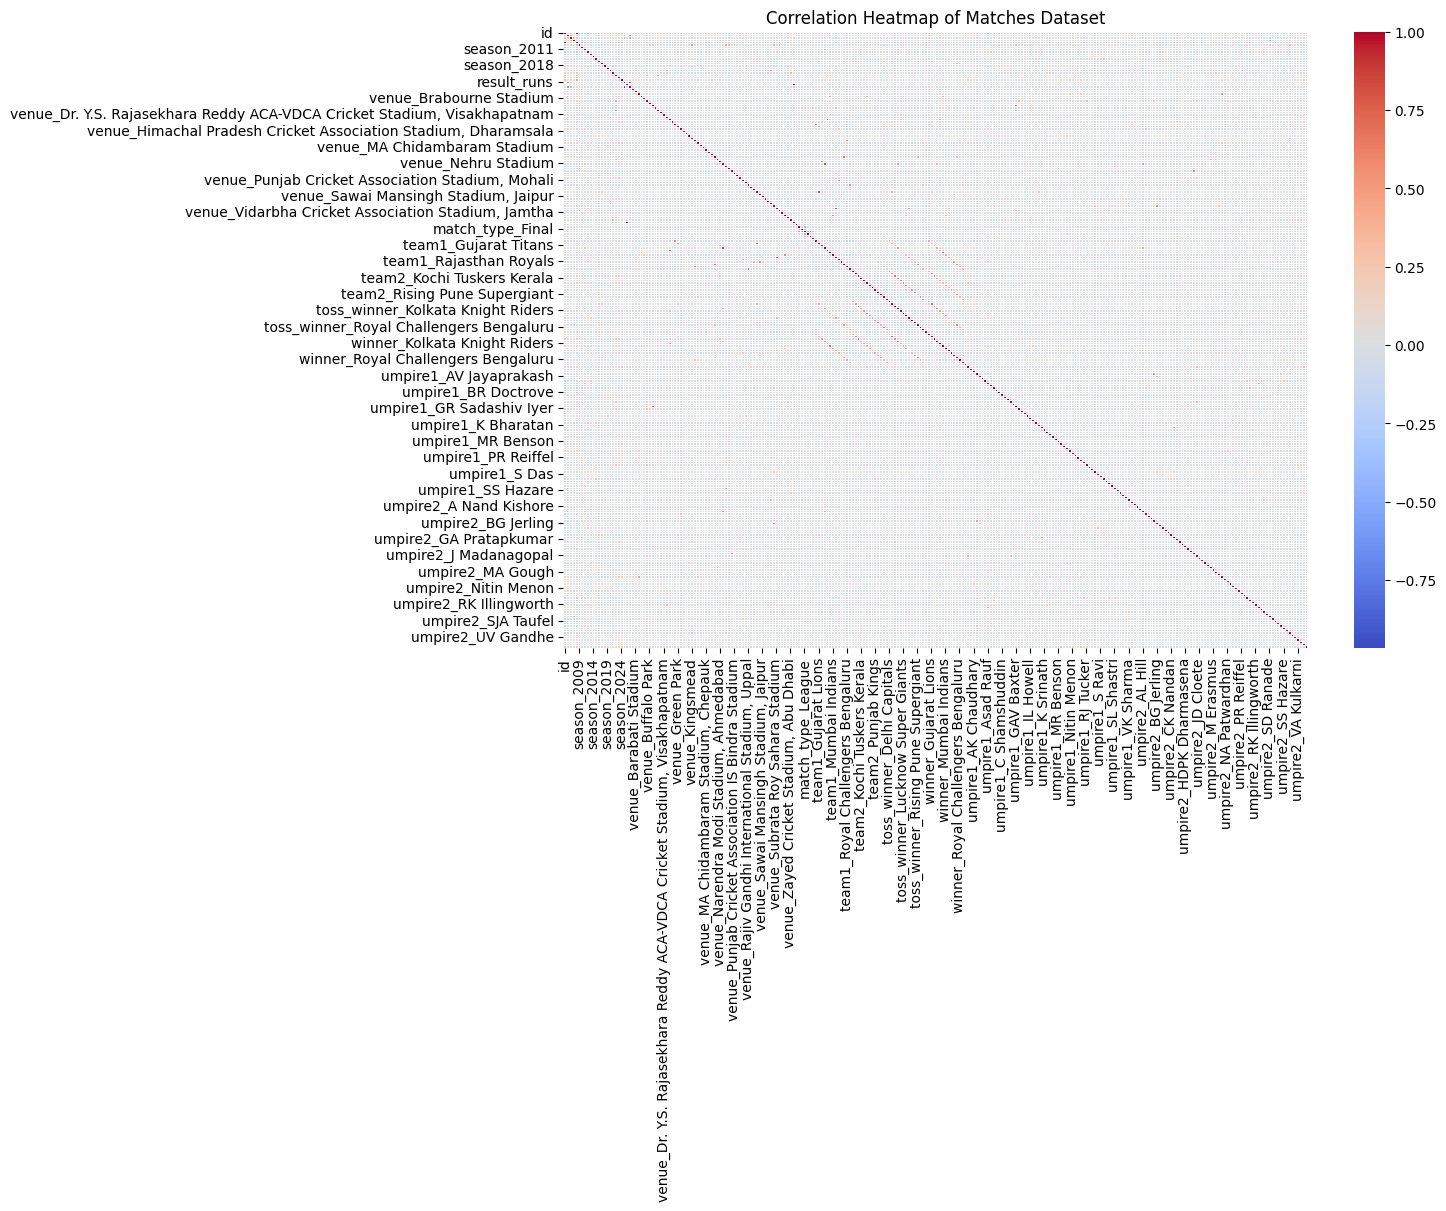

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert categorical columns to numerical if needed for correlation analysis
matches_encoded = datasets["matches"].copy()
matches_encoded = matches_encoded.drop(columns=['city', 'date', 'player_of_match', 'method'])

# Encode categorical variables
matches_encoded = pd.get_dummies(matches_encoded, columns=['season', 'result', 'venue', 'super_over', 'match_type', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'umpire1', 'umpire2'], drop_first=True)

# Compute correlation matrix
corr_matrix = matches_encoded.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Matches Dataset")
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Drop unnecessary columns and handle missing values in matches dataset
matches_cleaned = datasets["matches"].drop(columns=["city", "date", "player_of_match", "method", "umpire1", "umpire2"])

# Fill missing values
matches_cleaned["winner"].fillna("No Result", inplace=True)  # Treat missing winner as 'No Result'
matches_cleaned.fillna(0, inplace=True)  # Fill other missing values with 0

# Encode categorical variables
matches_encoded = pd.get_dummies(matches_cleaned, columns=["match_type", "team1", "team2", "toss_winner", "toss_decision", "winner"], drop_first=True)

matches_encoded = matches_encoded.rename(columns={'toss_winner': 'toss_win'})

# Define features and target
X = matches_encoded.drop(columns=[col for col in matches_encoded.columns if "winner_" in col])  # Remove winner columns
y = matches_encoded[[col for col in matches_encoded.columns if "winner_" in col]]  # Multi-class target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check shapes of final datasets
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape


<ipython-input-12-b58151e41a2e>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches_cleaned["winner"].fillna("No Result", inplace=True)  # Treat missing winner as 'No Result'


ValueError: could not convert string to float: '2007/08'

In [13]:
# Convert season column to integer (extract first year)
matches_cleaned["season"] = matches_cleaned["season"].astype(str).str[:4].astype(int)

# Re-encode categorical variables and preprocess again
matches_encoded = pd.get_dummies(matches_cleaned, columns=["match_type", "team1", "team2", "toss_winner", "toss_decision", "winner"], drop_first=True)

# Redefine features and target
X = matches_encoded.drop(columns=[col for col in matches_encoded.columns if "winner_" in col])
y = matches_encoded[[col for col in matches_encoded.columns if "winner_" in col]]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check shapes of final datasets
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape


ValueError: could not convert string to float: 'M Chinnaswamy Stadium'

In [14]:
# Encode "venue" as categorical
matches_cleaned = pd.get_dummies(matches_cleaned, columns=["venue"], drop_first=True)

# Re-encode categorical variables and preprocess again
matches_encoded = pd.get_dummies(matches_cleaned, columns=["match_type", "team1", "team2", "toss_winner", "toss_decision", "winner"], drop_first=True)

# Redefine features and target
X = matches_encoded.drop(columns=[col for col in matches_encoded.columns if "winner_" in col])
y = matches_encoded[[col for col in matches_encoded.columns if "winner_" in col]]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check shapes of final datasets
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape


ValueError: could not convert string to float: 'runs'

In [15]:
# Identify non-numeric columns in X
non_numeric_cols = X.select_dtypes(include=['object']).columns.tolist()
non_numeric_cols


['result', 'super_over']

In [16]:
# Encode "result" and "super_over" as categorical
matches_cleaned["super_over"] = matches_cleaned["super_over"].map({"Y": 1, "N": 0})  # Convert to binary

# One-hot encode "result"
matches_cleaned = pd.get_dummies(matches_cleaned, columns=["result"], drop_first=True)

matches_cleaned = matches_cleaned.rename(columns={'toss_winner': 'toss_win'})

# Re-encode categorical variables and preprocess again
matches_encoded = pd.get_dummies(matches_cleaned, columns=["match_type", "team1", "team2", "toss_win", "toss_decision", "winner"], drop_first=True)

# Redefine features and target
X = matches_encoded.drop(columns=[col for col in matches_encoded.columns if "winner_" in col])
y = matches_encoded[[col for col in matches_encoded.columns if "winner_" in col]]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check shapes of final datasets
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape


((766, 114), (164, 114), (165, 114), (766, 14), (164, 14), (165, 14))

In [17]:
y

,winner_Delhi Capitals,winner_Gujarat Lions,winner_Gujarat Titans,winner_Kochi Tuskers Kerala,winner_Kolkata Knight Riders,winner_Lucknow Super Giants,winner_Mumbai Indians,winner_No Result,winner_Pune Warriors,winner_Punjab Kings,winner_Rajasthan Royals,winner_Rising Pune Supergiant,winner_Royal Challengers Bengaluru,winner_Sunrisers Hyderabad
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1091,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1092,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1093,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [18]:
X.columns

Index(['id', 'season', 'result_margin', 'target_runs', 'target_overs',
       'super_over', 'season_no', 'venue_Arun Jaitley Stadium, Delhi',
       'venue_Barabati Stadium', 'venue_Barsapara Cricket Stadium, Guwahati',
       ...
       'toss_win_Kolkata Knight Riders', 'toss_win_Lucknow Super Giants',
       'toss_win_Mumbai Indians', 'toss_win_Pune Warriors',
       'toss_win_Punjab Kings', 'toss_win_Rajasthan Royals',
       'toss_win_Rising Pune Supergiant',
       'toss_win_Royal Challengers Bengaluru', 'toss_win_Sunrisers Hyderabad',
       'toss_decision_field'],
      dtype='object', length=114)

In [19]:
y.columns

Index(['winner_Delhi Capitals', 'winner_Gujarat Lions',
       'winner_Gujarat Titans', 'winner_Kochi Tuskers Kerala',
       'winner_Kolkata Knight Riders', 'winner_Lucknow Super Giants',
       'winner_Mumbai Indians', 'winner_No Result', 'winner_Pune Warriors',
       'winner_Punjab Kings', 'winner_Rajasthan Royals',
       'winner_Rising Pune Supergiant', 'winner_Royal Challengers Bengaluru',
       'winner_Sunrisers Hyderabad'],
      dtype='object')

Epoch 1/30 - Train Loss: 2.5785, Train Acc: 0.2193, Val Loss: 2.4651, Val Acc: 0.3049
Epoch 2/30 - Train Loss: 2.2458, Train Acc: 0.5052, Val Loss: 2.1255, Val Acc: 0.4512
Epoch 3/30 - Train Loss: 1.6784, Train Acc: 0.5483, Val Loss: 1.7051, Val Acc: 0.4939
Epoch 4/30 - Train Loss: 1.2429, Train Acc: 0.6044, Val Loss: 1.4483, Val Acc: 0.5061
Epoch 5/30 - Train Loss: 1.0183, Train Acc: 0.6384, Val Loss: 1.3612, Val Acc: 0.5183
Epoch 6/30 - Train Loss: 0.8697, Train Acc: 0.6749, Val Loss: 1.3176, Val Acc: 0.5122
Epoch 7/30 - Train Loss: 0.7462, Train Acc: 0.7167, Val Loss: 1.2828, Val Acc: 0.5122
Epoch 8/30 - Train Loss: 0.6491, Train Acc: 0.7454, Val Loss: 1.2583, Val Acc: 0.5305
Epoch 9/30 - Train Loss: 0.5556, Train Acc: 0.7937, Val Loss: 1.2365, Val Acc: 0.5427
Epoch 10/30 - Train Loss: 0.4773, Train Acc: 0.8264, Val Loss: 1.2648, Val Acc: 0.5366
Epoch 11/30 - Train Loss: 0.4197, Train Acc: 0.8473, Val Loss: 1.2943, Val Acc: 0.5122
Epoch 12/30 - Train Loss: 0.3680, Train Acc: 0.8629,

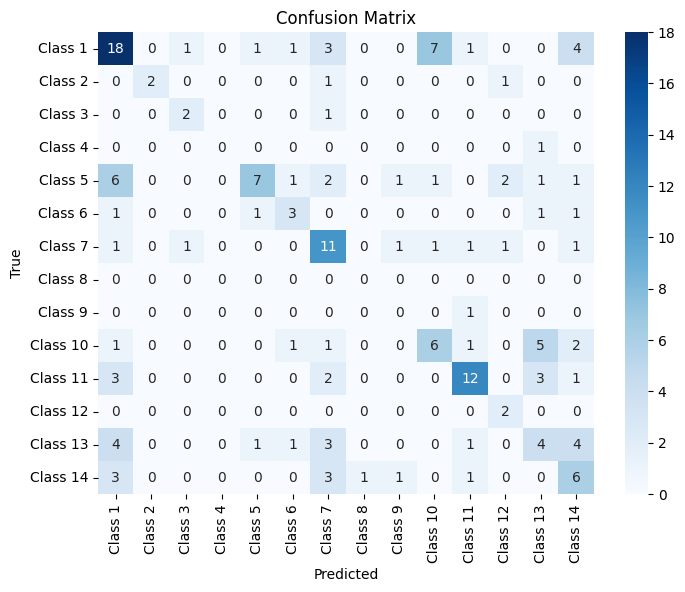

Classification Report:
              precision    recall  f1-score   support

     Class 1       0.49      0.50      0.49        36
     Class 2       1.00      0.50      0.67         4
     Class 3       0.50      0.67      0.57         3
     Class 4       0.00      0.00      0.00         1
     Class 5       0.70      0.32      0.44        22
     Class 6       0.43      0.43      0.43         7
     Class 7       0.41      0.61      0.49        18
     Class 8       0.00      0.00      0.00         0
     Class 9       0.00      0.00      0.00         1
    Class 10       0.40      0.35      0.38        17
    Class 11       0.67      0.57      0.62        21
    Class 12       0.33      1.00      0.50         2
    Class 13       0.27      0.22      0.24        18
    Class 14       0.30      0.40      0.34        15

    accuracy                           0.44       165
   macro avg       0.39      0.40      0.37       165
weighted avg       0.48      0.44      0.44       165



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

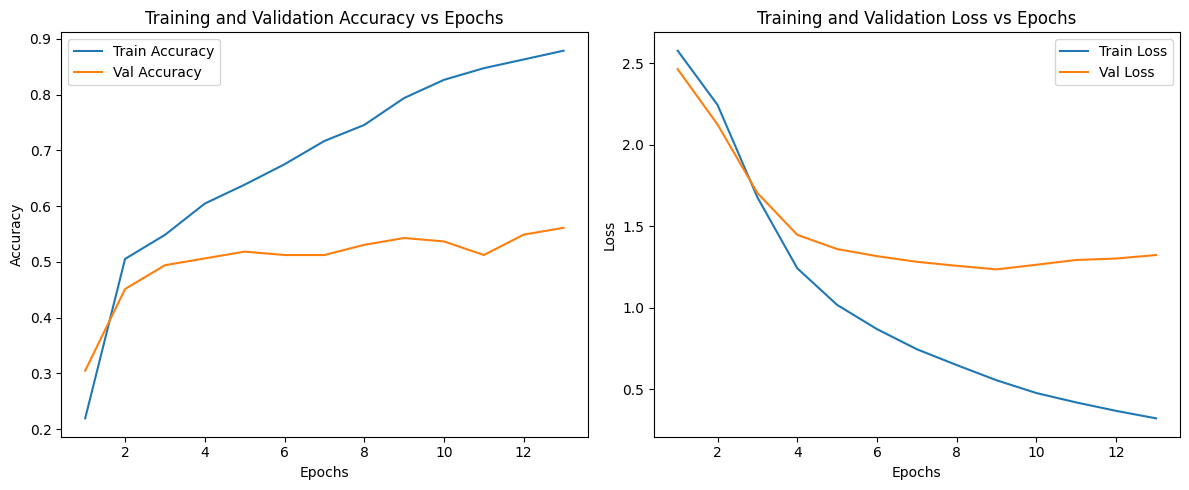

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert datasets to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)  # Changed to long for CrossEntropyLoss
y_train_tensor = torch.tensor(np.argmax(y_train.values, axis=1), dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
# y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)
y_val_tensor = torch.tensor(np.argmax(y_val.values, axis=1), dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
# y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)
y_test_tensor = torch.tensor(np.argmax(y_test.values, axis=1), dtype=torch.long)


# Create DataLoaders
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the ANN model
class ANNModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.activation = nn.SiLU()  # Using SiLU activation
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_size)  # Output size should be the number of classes (14)

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)  # No activation here, as we apply softmax in the loss function
        return x

# Model, loss function, and optimizer
input_size = X_train.shape[1]
output_size = y_train.shape[1]  # Output size is the number of classes (14)
model = ANNModel(input_size, output_size)

criterion = nn.CrossEntropyLoss()  # Using CrossEntropyLoss for multi-class classification
optimizer = optim.AdamW(model.parameters(), lr=0.001)

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Early stopping parameters
early_stop_patience = 4
best_val_loss = float("inf")
epochs_no_improve = 0

# Training the model
num_epochs = 30
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)  # Get the class with the highest probability
        correct += (predicted == labels).sum().item()
        total += labels.numel()

    train_loss = running_loss / len(train_loader)
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation step
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)  # Get the class with the highest probability
            val_correct += (predicted == labels).sum().item()
            val_total += labels.numel()

    val_loss /= len(val_loader)
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), "best_model.pth")  # Save best model
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= early_stop_patience:
            print("Early stopping triggered.")
            break

# Test phase
model.eval()
test_correct, test_total = 0, 0
all_preds, all_labels = [], []

# Collect predictions and labels from the test loader
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)  # Get the class with the highest probability

        all_preds.extend(predicted.cpu().numpy())  # Move to CPU for easier handling
        all_labels.extend(labels.cpu().numpy())

        test_correct += (predicted == labels).sum().item()
        test_total += labels.numel()

# Compute the accuracy on the test set
test_acc = test_correct / test_total
print(f"Test Accuracy: {test_acc:.4f}")

# Convert lists to numpy arrays for compatibility with sklearn metrics
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Generate confusion matrix
cm = confusion_matrix(all_labels.flatten(), all_preds.flatten())  # Flatten to handle multi-class classification
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class " + str(i) for i in range(1, 15)],
            yticklabels=["Class " + str(i) for i in range(1, 15)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(all_labels.flatten(), all_preds.flatten(), target_names=["Class " + str(i) for i in range(1, 15)]))

# Plotting training and validation accuracy vs epochs
plt.figure(figsize=(12, 5))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epochs')
plt.legend()

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs Epochs')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
